LABEL ENCODING

USING ONLY PANDAS AND NO SCIKIT-LEARN LIBRARY

In [84]:
import pandas as pd

dataset = pd.read_csv('housing_price_dataset.csv')

dataset['encoded category'] = dataset['Neighborhood'].astype('category').cat.codes
dataset.to_csv('g.house price label encoded.csv')
dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,encoded category
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,0
49996,2854,2,2,Suburb,1988,374507.656727,1
49997,2979,5,3,Suburb,1962,384110.555590,1
49998,2596,5,2,Rural,1984,380512.685957,0


USING SCIKIT-LEARN LIBRARY

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset1 = pd.read_csv('housing_price_dataset.csv')
laben = LabelEncoder()
dataset1['encoded category'] = laben.fit_transform(dataset1['Neighborhood'])
dataset1.to_csv('g.house price label encoded ( scikit-learn library).csv')
dataset1

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,encoded category
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,0
49996,2854,2,2,Suburb,1988,374507.656727,1
49997,2979,5,3,Suburb,1962,384110.555590,1
49998,2596,5,2,Rural,1984,380512.685957,0


ONE-HOT ENCODING

USING PANDAS ( get.dummies(dataframe name , column name) )

In [86]:
import pandas as pd

dataset2 = pd.read_csv('housing_price_dataset.csv')

dataset2 = pd.get_dummies(dataset2 ,'Neighborhood').astype(int)
#datatype changed to int as only boolean values were displayed before
dataset2.to_csv('g.house price one-hot encoded.csv')
dataset2

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080,1,0,0
49996,2854,2,2,1988,374507,0,1,0
49997,2979,5,3,1962,384110,0,1,0
49998,2596,5,2,1984,380512,1,0,0


USING MANUAL TECHNIQUE WITHOUT INBUILD FUNCTIONS

In [87]:
import pandas as pd

dataset3 = pd.read_csv('housing_price_dataset.csv')

category_feature = dataset3['Neighborhood'].unique()
#the unique categories taken from the category feature

for unique_category in category_feature:
    dataset3[f'{unique_category}'] = dataset3['Neighborhood'].apply(lambda x: 1 if x == unique_category else 0 )
#puts 1 if the observation == to the unique value    

dataset3.to_csv('g.house price one-hot encoded ( manually ).csv')
#if you want u could drop the column
dataset3.drop('Neighborhood' , axis = 1, inplace=True)
dataset3

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


USING SCIKIT-LEARN

In [126]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

dataset4 = pd.read_csv('housing_price_dataset.csv')
onehot = OneHotEncoder(sparse_output=False)
new = onehot.fit_transform(dataset4[['Neighborhood']])
features_names = onehot.get_feature_names_out(['Neighborhood'])
df = pd.DataFrame(new , columns=features_names)
df = pd.concat([dataset4,df],axis=1)
df = df.drop('Neighborhood' ,axis=1)
df = df[df.columns].astype(int)
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080,1,0,0
49996,2854,2,2,1988,374507,0,1,0
49997,2979,5,3,1962,384110,0,1,0
49998,2596,5,2,1984,380512,1,0,0


In [106]:
df.duplicated().sum()

0

In [107]:
df.isnull().sum()

SquareFeet    0
Bedrooms      0
Bathrooms     0
YearBuilt     0
Price         0
0             0
1             0
2             0
dtype: int64

VISUALIZATION USING MATPLOTLIB

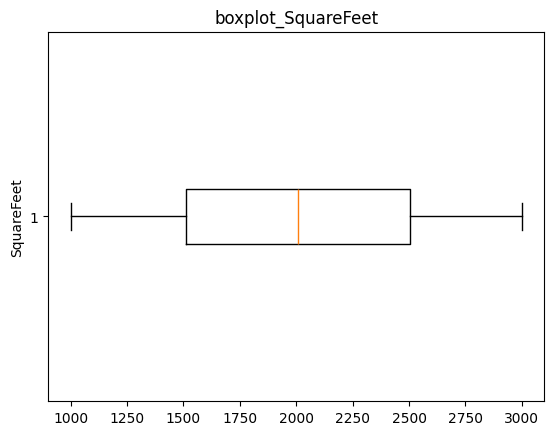

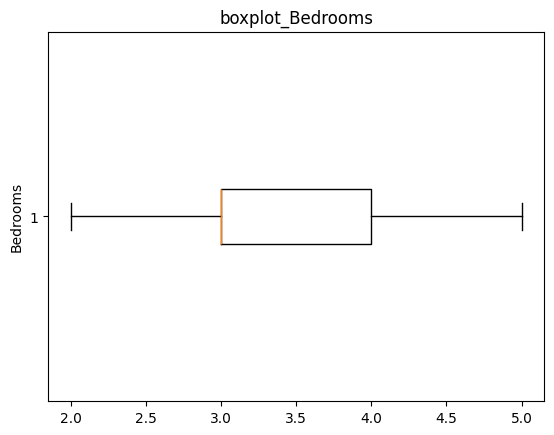

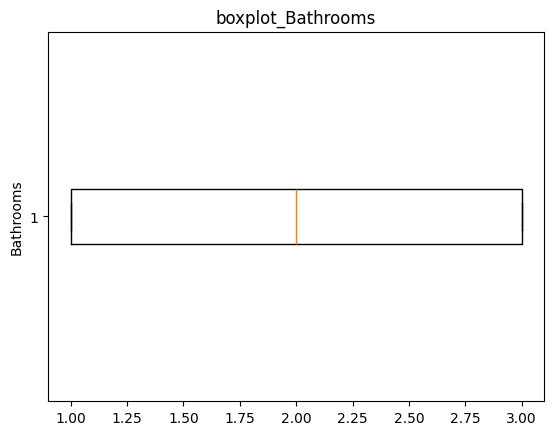

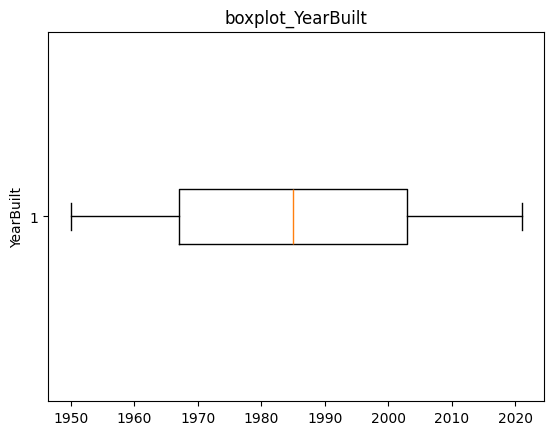

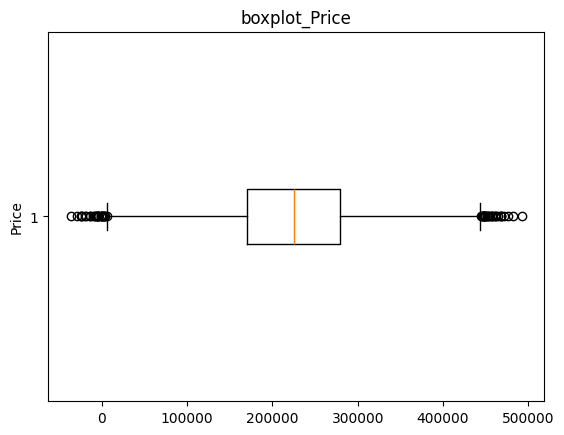

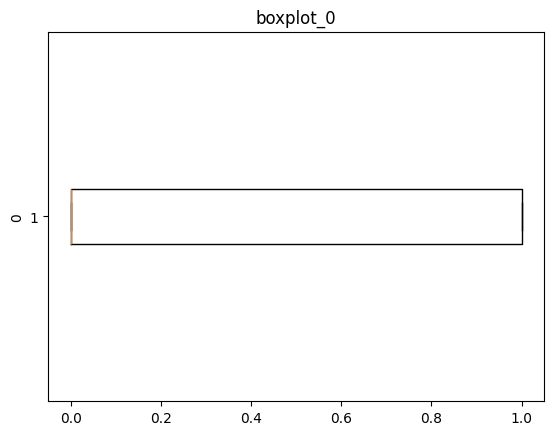

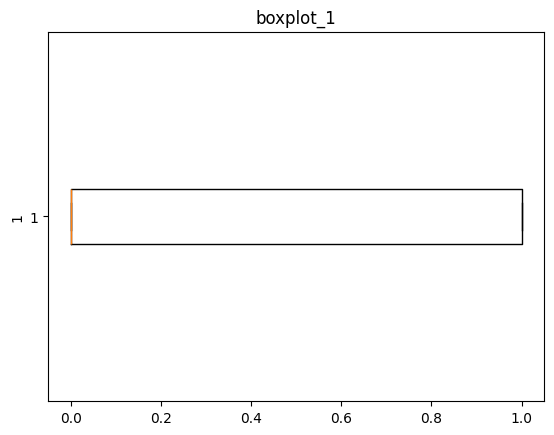

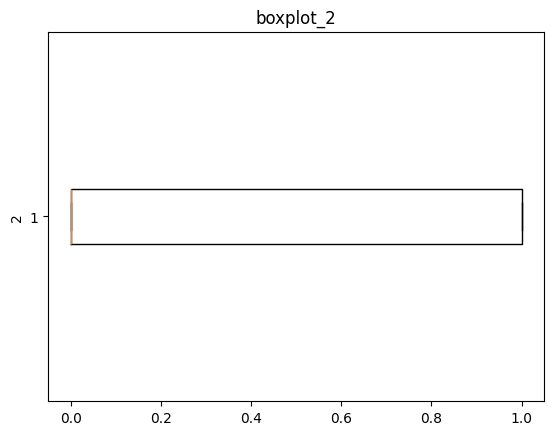

In [117]:
import matplotlib.pyplot as plt
for i in df.select_dtypes("number"):
    plt.boxplot(df[i],vert=False)
    plt.ylabel(i)
    plt.title(f'boxplot_{i}')
    plt.show()

VISUALIZATION USING SEABORN

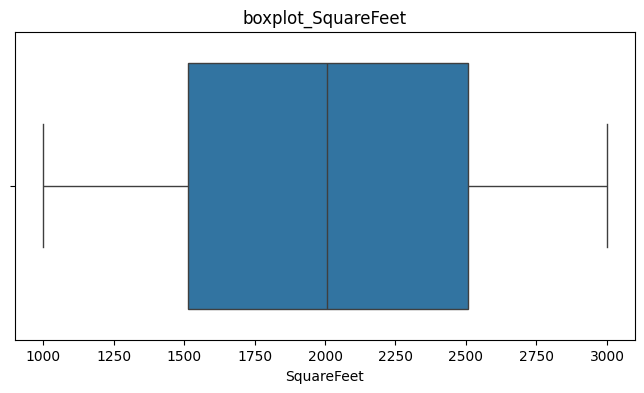

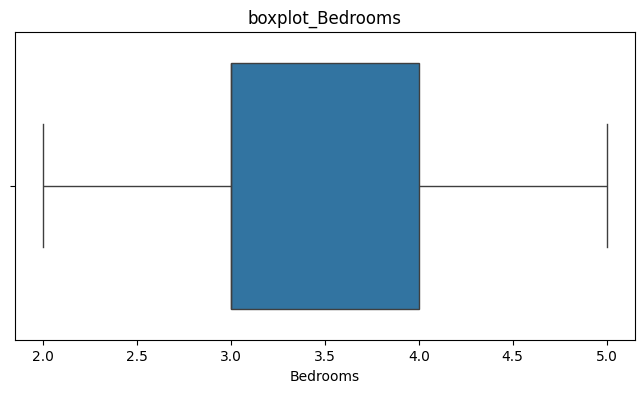

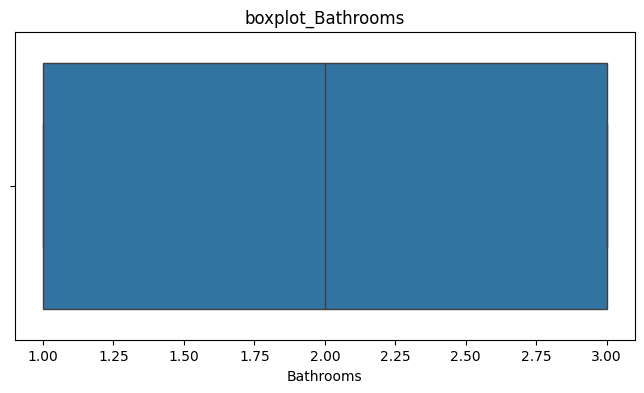

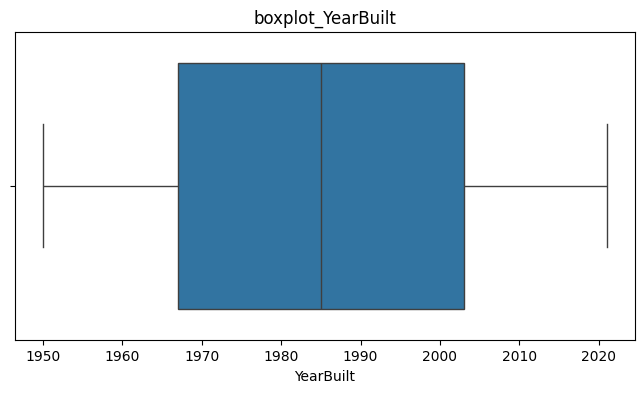

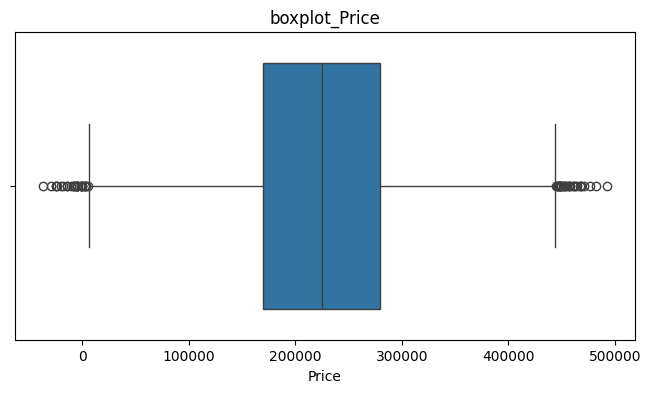

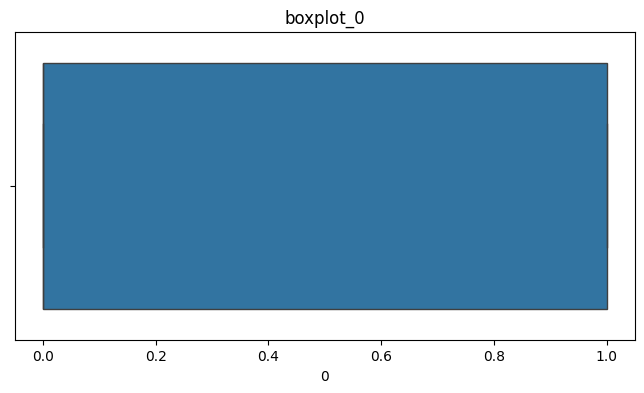

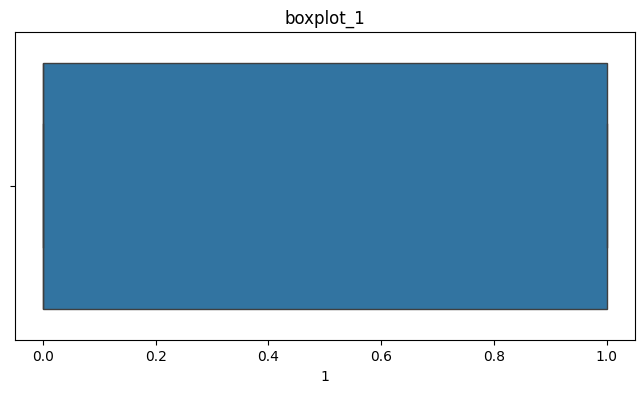

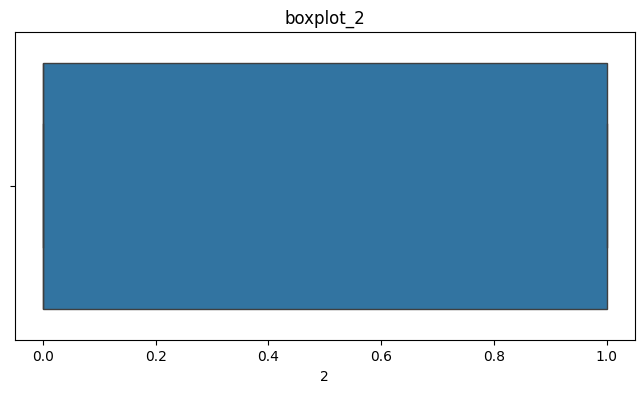

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.select_dtypes("number"):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df,x=i)
    plt.xlabel(i)
    plt.title(f'boxplot_{i}')
    plt.show()

LETS PERFORM TARGET ORDINAL ENCODING ALSO

MANUALLY AND THERE IS NO WAY TO IMPLEMENT WITH SCIKIT-LEARN

In [133]:
import pandas as pd

datanew = pd.read_csv('housing_price_dataset.csv')
target_set = datanew.groupby('Neighborhood')['Price'].mean()
datanew['target'] = datanew['Neighborhood'].map(target_set)
datanew.to_csv('g.house price target encoded.csv')
datanew

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,target
0,2126,4,1,Rural,1969,215355.283618,224096.126040
1,2459,3,2,Rural,1980,195014.221626,224096.126040
2,1860,2,1,Suburb,1970,306891.012076,223234.189857
3,2294,2,1,Urban,1996,206786.787153,227166.197139
4,2130,5,2,Suburb,2001,272436.239065,223234.189857
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,224096.126040
49996,2854,2,2,Suburb,1988,374507.656727,223234.189857
49997,2979,5,3,Suburb,1962,384110.555590,223234.189857
49998,2596,5,2,Rural,1984,380512.685957,224096.126040
